# Thomas Fermi Potential

The Lindhard derivation in NAC I, II, and III is based on the Thomas Fermi screened potential. It turns out that this potential is a little hard to pin down, and I located some references in N-MISC-18-002 pg 13-14. Here I want to plot the functions I found, there is one numerically defined version, and two limiting cases.

In [1]:
import intdiff as id 
import numpy as np

f_LT = id.getphi0('LT')
f_HT = id.getphi0('HT')
f_match = id.getphi0('matched')
f = id.getphi0('numeric','data/phi0_NACI_format_mod1.txt')

In [2]:
#set up a plot 
import matplotlib as mpl
from matplotlib import pyplot as plt
#got smarter about the mpl config: see mplstyles/ directory
plt.style.use('standard')

1.30035818224e-07


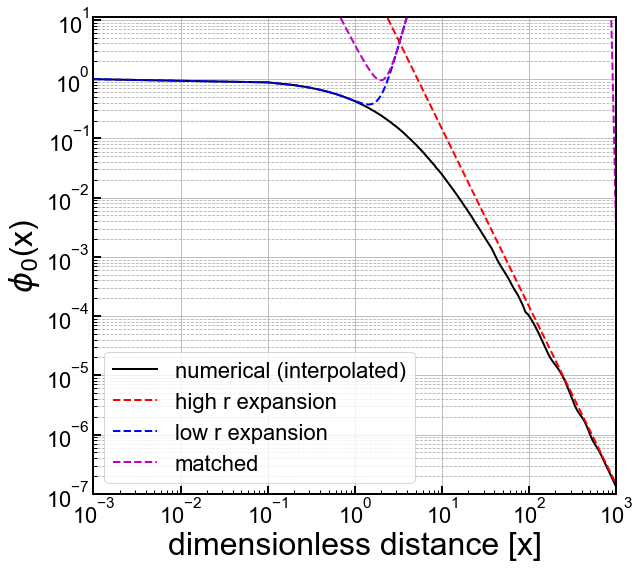

In [3]:
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

dx=0.1
X  = np.arange(0.001,1000,dx)

print(np.min(f(X)))

ax1.plot (X, f(X), 'k-', label='numerical (interpolated)')
ax1.plot (X, f_HT(X), 'r--', label='high r expansion')
ax1.plot (X, f_LT(X), 'b--', label='low r expansion')
ax1.plot (X, f_match(X), 'm--', label='matched')
#ax1.plot (X, ylind(X), 'k--', label='Lindhard')
#ax1.plot (X[X>0],ysingle(X[X>0]),'k-',linewidth=1)


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.001, 1000)
ax1.set_ylim(1e-7,11.1)
ax1.set_xlabel('dimensionless distance [x]',**axis_font)
ax1.set_ylabel('$\phi_0$(x)',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/TF-potential-wApprox.png')
plt.show()

# Thomas Fermi Derivative

In order to compute the function g(xi) (see N-MISC-18-002 pg 21) we need the derivative of the above function. 

In [4]:
#compute the derivative(s)
fpr_LT = id.getgradphi0('LT')
fpr_HT = id.getgradphi0('HT')
fpr = id.getgradphi0('numeric','data/phi0_NACI_format_mod1.txt')

1.30035818224e-07


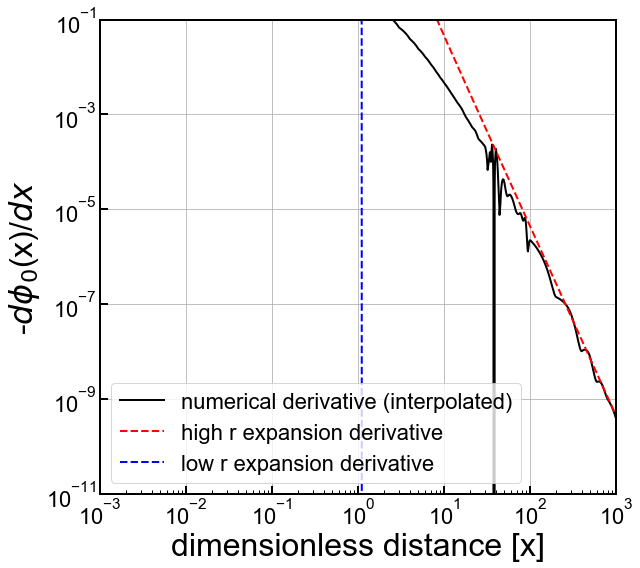

In [5]:
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

dx=0.1
X  = np.arange(0.001,1000,dx)

print(np.min(f(X)))

ax1.plot (X, -fpr(X), 'k-', label='numerical derivative (interpolated)')
ax1.plot (X, -fpr_HT(X), 'r--', label='high r expansion derivative')
ax1.plot (X, -fpr_LT(X), 'b--', label='low r expansion derivative')
#ax1.plot (X, ylind(X), 'k--', label='Lindhard')
#ax1.plot (X[X>0],ysingle(X[X>0]),'k-',linewidth=1)


ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_xlim(0.001, 1000)
ax1.set_ylim(1e-11,1e-1)
ax1.set_xlabel('dimensionless distance [x]',**axis_font)
ax1.set_ylabel('-$d\phi_0$(x)/$dx$',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=3,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/TF-potential-diffs-wApprox.png')
plt.show()

# Computing the Tau Function (N-MISC-18-002 pg 26)

The Tau function is the one we have to find the roots of to "invert" the relationship between the lambda function and the energy transfer t. 

In [6]:

gxi = lambda x: id.g(x,'numeric')[0]
print(gxi(1))
tau_0 = lambda x: 10 - (1/x)*gxi(x)
tau_0v = np.vectorize(tau_0)
tau_1 = lambda x: 1 - (1/x)*gxi(x)
tau_1v = np.vectorize(tau_1)
tau_2 = lambda x: 0.01 - (1/x)*gxi(x)
tau_2v = np.vectorize(tau_2)
tau_3 = lambda x: 0.001 - (1/x)*gxi(x)
tau_3v = np.vectorize(tau_3)

0.34916698059232354


/home/phys/villaa/python/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/home/phys/villaa/python/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


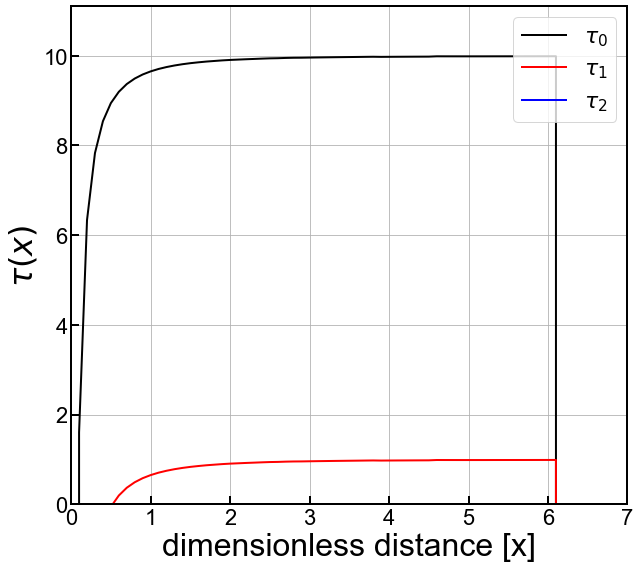

In [7]:
#set up a plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

dx=0.1
xmax = 7
X  = np.arange(0.0001,xmax,dx)


ax1.plot (X, tau_0v(X), 'k-', label='$\\tau_0$')
ax1.plot (X, tau_1v(X), 'r-', label='$\\tau_1$')
ax1.plot (X, tau_2v(X), 'b-', label='$\\tau_2$')
#print(tau_2v(X))
#ax1.plot (X, tau_3v(X), 'g-', label='$\tau$$_3$')
#ax1.plot (X, ylind(X), 'k--', label='Lindhard')
#ax1.plot (X[X>0],ysingle(X[X>0]),'k-',linewidth=1)


ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_xlim(0.001, xmax)
ax1.set_ylim(0,11.1)
ax1.set_xlabel('dimensionless distance [x]',**axis_font)
ax1.set_ylabel('$\\tau(x)$',**axis_font)
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/tau_test.png')
plt.show()